신경망이 깊다면 역전파 과정에서 입력층으로 갈수록 기울기가 점차적으로 작아질 수 있다. <br>
위 현상이 발생하면 입력층에 가까운 층들에서 가중치들의 업데이트가 제대로 되지 않는다. <br>
이러한 현상을 **기울기 소실(Gradient Vanishing)**이라고 한다. 

위와 반대로 기울기가 점차 커져 가중치들이 비정상적으로 큰 값이 되어 발산되기도 한다. <br>
이러한 현상을 **기울기 폭주(Gradient Exploding)**라고 한다.

## <strong> 1. ReLU와 ReLU의 변형들 </strong>

은닉층의 활성화 함수로 시그모이드, 하이퍼볼릭탄젠트 함수 대신 ReLU나 ReLU의 변형 함수를 사용하면 기울기 소실을 완화할 수 있다.

## <strong> 2. 가중치 초기화 </strong>

같은 모델을 훈련시켜도 가중치의 초기값에 따라 모델의 훈련 결과가 달라진다. <br>
즉, 가중치 초기화만 잘 해줘도 여러 문제를 완화할 수 있다.

<h3> <strong> 2.1 세이비어 초기화 </strong> </h3>

이 방법은 **균등 분포(Uniform Distribution)** 또는 **정규 분포(Normal distribution)**로 초기화할 때 두 가지 경우로 나뉜다. <br>
또한 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세운다. <br>

균등 분포를 사용하여 가중치를 초기화할 경우 다음과 같은 균등 분포 범위를 사용한다.

$W ∼ Uniform(-\sqrt{\frac{6}{n_{in}+n_{out}}}, +\sqrt{\frac{6}{n_{in}+n_{out}}})$

정규 분포의 경우 평균이 0이고 표준 편차가 $σ$가 다음을 만족하도록 한다.

$\sigma = \sqrt{\frac{2}{n_{in}+n_{out}}}$

세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰 특정 층이 너무 주목 받거나 뒤쳐지는 것을 막는다. <br>
세이비어 초기화는 시그모이드 함수나 하이퍼볼릭 함수와 같은 활성화 함수에는 좋은 성능을 보인다. <br>
하지만 ReLU의 경우 성능이 좋지 않다. 

ReLU와 그 변형 함수들을 사용할 경우 **He 초기화(He initialization)**라고 한다.

<h3> <strong> 2.2 He 초기화 </strong> </h3>

He 초기화는 세이비어 초기화와 유사하게 정규 분포와 균등 분포 두 가지 경우로 나뉜다. <br>
단, He 초기화는 다음 층의 뉴런의 개수를 반영하지 않는다.

$W ∼ Uniform(-\sqrt{\frac{6}{n_{in}}}, +\sqrt{\frac{6}{n_{in}}})$

$\sigma = \sqrt{\frac{2}{n_{in}}}$

* 다른 ReLU 계열 함수보다 ReLU + He 초기화 방법이 좀 더 보편적이다.

## <strong> 3. 배치 정규화 </strong>

**배치 정규화(Batch Normalization)**이란 인공 시경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만든다. 

<h3> <strong> 3.1 내부 공변량 변화 </strong> </h3>

**내부 공변량 변화(Internal Covariate Shift)**란 학습 과정에서 **층 별로 입력 데이터 분포가 달라지는 현상**을 말한다. <br>
이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌면 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생한다. <br>
배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥러닝 모델 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장한다.

* 공변량 변화: 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우
* 내부 공변량 변화: 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화

<h3> <strong> 3.2 배치 정규화 </strong> </h3>

배치 정규화는 **한 번에 들어오는 배치 단위로 정규화하는 것을 말한다.** <br>
단, 각 층에서 활성화 함수를 통과하기 전에 수행된다. <br>
배치 정규화는 입력에 대해 평균을 0으로 만들고, 정규화를 해준다. <br>
이후 정규화된 데이터에 스케일과 시프트를 수행한다. <br>
이때 스케일 조정에 사용되는 매개변수가 $γ$이고, 시프트에 사용되는 매개변수는 $β$이다.



$B: {x^{(1)}, x^{(2)}, …, x^{(m)}} \, (입력/미니배치)$

$\mu_{B} = \frac{1}{m}∑_{i=1}^{m} x^{(i)} \, (미니 배치의 평균)$

$σ_B^2 = \frac{1}{m}∑_{i=1}^{m} (x^{(i)}-\mu_{B})^2 \, (미니 배치의 분산)$

$\hat{x}^{(i)} = \frac{x^{(i)}-μ_B}{\sqrt{σ_B^2+ϵ}} \, (정규화)$

$y^{(i)} = γ\hat{x}^{(i)}+β=BN_{γ,β}(x^{(i)}) \, (스케일 조정, 시프트)$


<h3> <strong> 3.3 배치 정규화의 한계 </strong> </h3>

**배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있다.** [ex) 배치 크기 = 1 -> 분산 = 0 ]<br>
따라서 배치 정규화를 적용할 때는 크기가 어느 정도 되는 미니 배치에서 하는 것이 좋다.

또한 RNN 모듈에서는 각 시점마다 다른 통계치를 가지기 때문에 **배치 정규화를 RNN에 적용하는 것은 어렵다.**

## <strong> 4. 층 정규화 </strong>

이전에 살펴본 배치 정규화를 그림으로 나타내면 다음과 같다. <br>
**단, 미니 배치란 동일 특성(feature) 개수들을 가진 다수의 샘플을 의미함을 상기하자.**

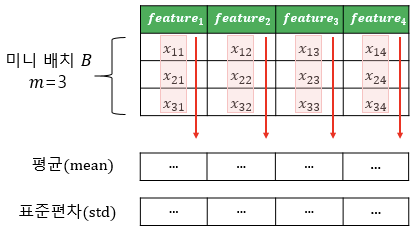


**층 정규화(Layer Normalization)**는 다음과 같다.

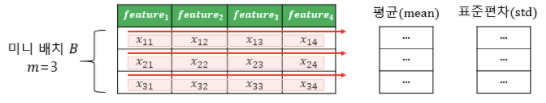

출처: https://wikidocs.net/61271